In [6]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: Htet_Khant_Linn


In [ ]:
# pipenv install pillow

###  Image Basics and Manipulation

<class 'PIL.PngImagePlugin.PngImageFile'>


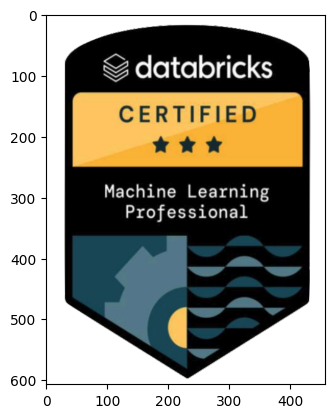

In [7]:
# Another Image Lib 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img = Image.open('image_folder/ml_professonal.png')
print(type(img))
plt.imshow(img)

In [8]:
# Convert PIL to numpy array

np_array = np.array(img)
print("")

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

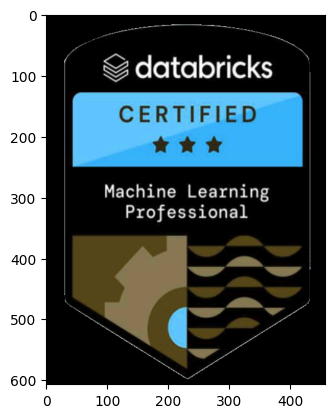

In [8]:
img_bgr = cv2.imread('image_folder/ml_professonal.png')
if img_bgr is None:
    print("Error: Could not load image for manipulation examples.")
    exit() # Exit if image not found


plt.imshow(img_bgr)  #this will not show the original color of the image

Original image:  (607, 458, 3)
Htet_Khant_Linn image:  (607, 458)


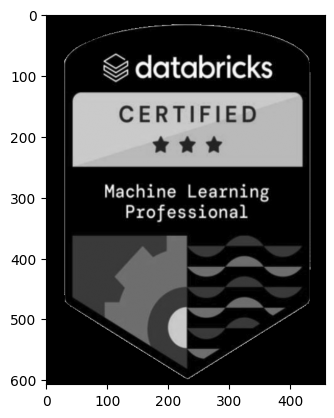

In [9]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print("Original image: ",img_rgb.shape)

# Grayscale Conversion
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
print(f"{ML_Summer_School_ID} image: ",img_gray.shape)
plt.imshow(img_gray,cmap='gray')

(100, 200, 3)


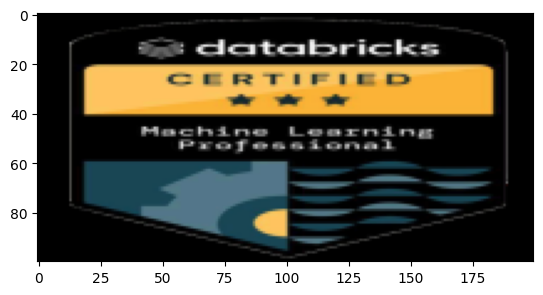

In [15]:
# Resizing 
new_width = 200
new_height = 100

img_size = (new_width, new_height)
resized_img = cv2.resize(img_bgr, img_size, interpolation=cv2.INTER_AREA)
print(resized_img.shape)

resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
plt.imshow(resized_img_rgb)


(80, 110, 3)


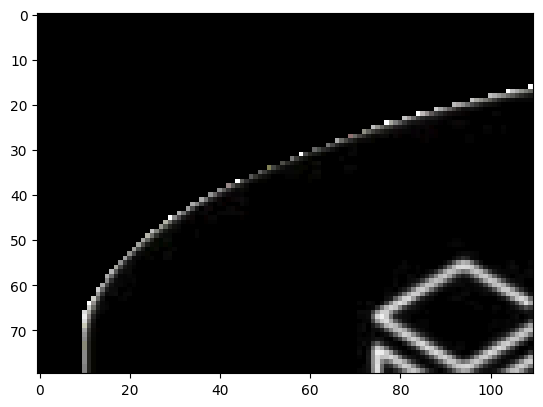

In [14]:
# Cropping 
cropped_img = img_bgr[10:90, 20:130] # Crop from y=10 to 90, x=20 to 130
print(cropped_img.shape)


cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_img_rgb)


(607, 458)


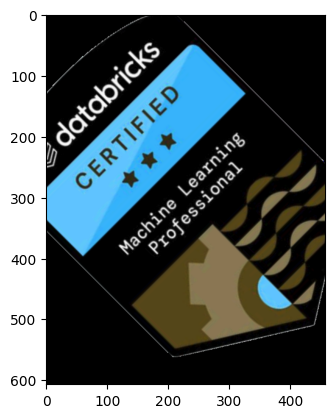

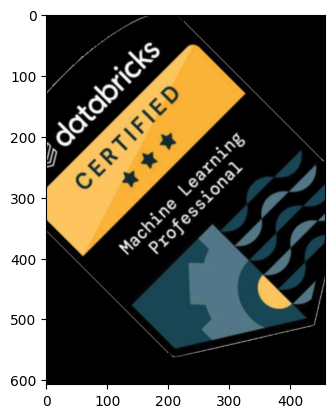

In [21]:
# Rotation
(h, w) = img_bgr.shape[:2]
print(img_bgr.shape[:2])    # :2 slices the first two elements → (height, width)
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0) # Rotate 45 degrees, 1.0 scale


rotated_img = cv2.warpAffine(img_bgr, M, (w, h))    #cv2.warpAffine() performs the actual rotation
# (w, h) sets the output image size (same as input).
rotated_img_rgb = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)

plt.imshow(rotated_img)
plt.show()
plt.imshow(rotated_img_rgb)
plt.show()

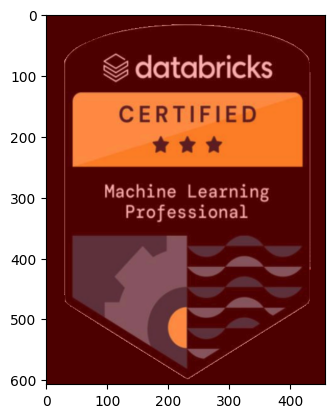

In [22]:
# Create a second dummy image for blending
dummy_image2 = np.zeros_like(img_bgr)
dummy_image2[:] = (0, 0, 255) # Red color
blended_img = cv2.addWeighted(img_bgr, 0.7, dummy_image2, 0.3, 0)   # the combination of 0.7 and 0.3 need to be 1)


blended_img_rgb = cv2.cvtColor(blended_img, cv2.COLOR_BGR2RGB)
plt.imshow(blended_img_rgb)
plt.show()

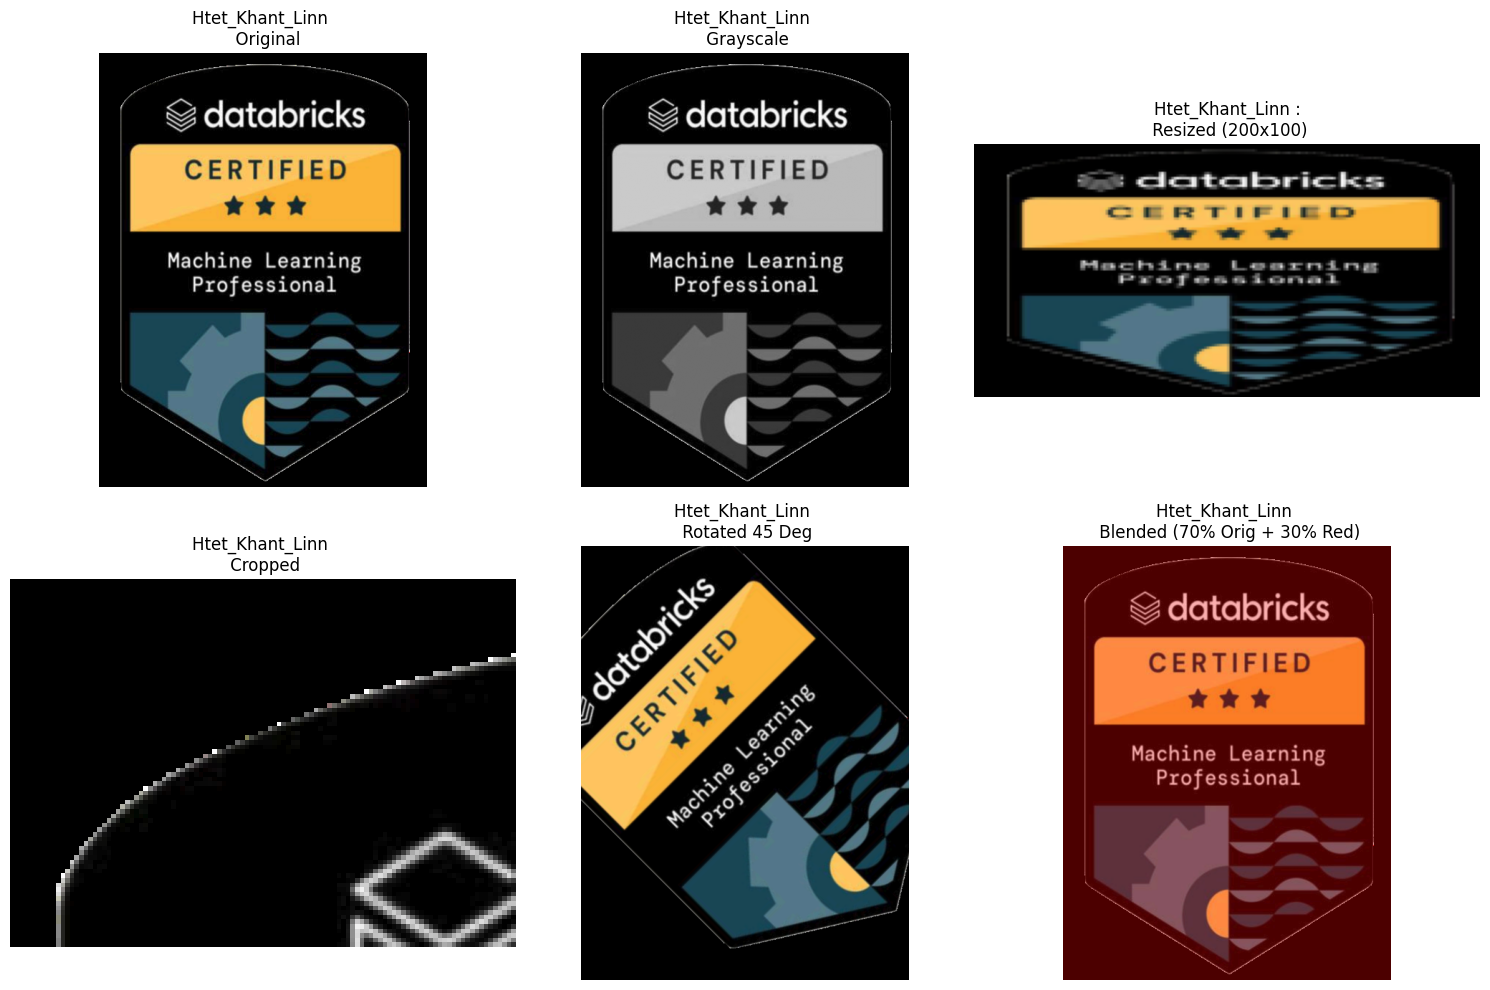

In [23]:
# Display all manipulated images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title(f'{ML_Summer_School_ID} \n  Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_gray, cmap='gray')
axes[0, 1].set_title(f'{ML_Summer_School_ID} \n Grayscale')
axes[0, 1].axis('off')

axes[0, 2].imshow(resized_img_rgb)
axes[0, 2].set_title(f'{ML_Summer_School_ID} :\n Resized ({new_width}x{new_height})')
axes[0, 2].axis('off')

axes[1, 0].imshow(cropped_img_rgb)
axes[1, 0].set_title(f'{ML_Summer_School_ID} \n Cropped')
axes[1, 0].axis('off')

axes[1, 1].imshow(rotated_img_rgb)
axes[1, 1].set_title(f'{ML_Summer_School_ID} \n Rotated 45 Deg')
axes[1, 1].axis('off')

axes[1, 2].imshow(blended_img_rgb)
axes[1, 2].set_title(f'{ML_Summer_School_ID} \n Blended (70% Orig + 30% Red)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()